# Trayectoria de pozo desviado

El siguiente ejercicio se trabajo con datos proporcionados por el Ing. Douglas Alberto Gómez Reyes.

**Objetivos:**

-Gráfica de los planos del pozo (XZ, YZ, XY) en 2D y 3D.

-Deducción de azimut e inclinación mediante relaciones trigonométricas y la ley de cosenos directores.

-Converción de los valores de inclinación y azimut obtenios a coordenadas. 

-Cálculo de la profundidad desarrollada (MD).

**Autores:**
Karla Alejandra Colorado León.
Abel Vargas Taracena

**Definir biblioteca a utilizar**

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

**Importación de datos**

In [14]:
A=pd.read_csv('Trayectoria2.csv')
A.columns 

Index(['TVD', 'X', 'Y'], dtype='object')

**Representación estadistica de los datos**

In [15]:
type(A)
A.describe()

,TVD,X,Y
count,248.000000,248.000000,2.480000e+02
mean,3597.146411,517113.578548,2.109864e+06
std,2038.516058,460.154973,5.300886e+00
min,-9.000000,515985.260000,2.109860e+06
25%,1843.500000,516802.920000,2.109860e+06
50%,3696.000000,517440.000000,2.109860e+06
75%,5349.225000,517440.000000,2.109867e+06
max,7005.910000,517440.000000,2.109877e+06


**Grafica 2D de los planos del pozo**


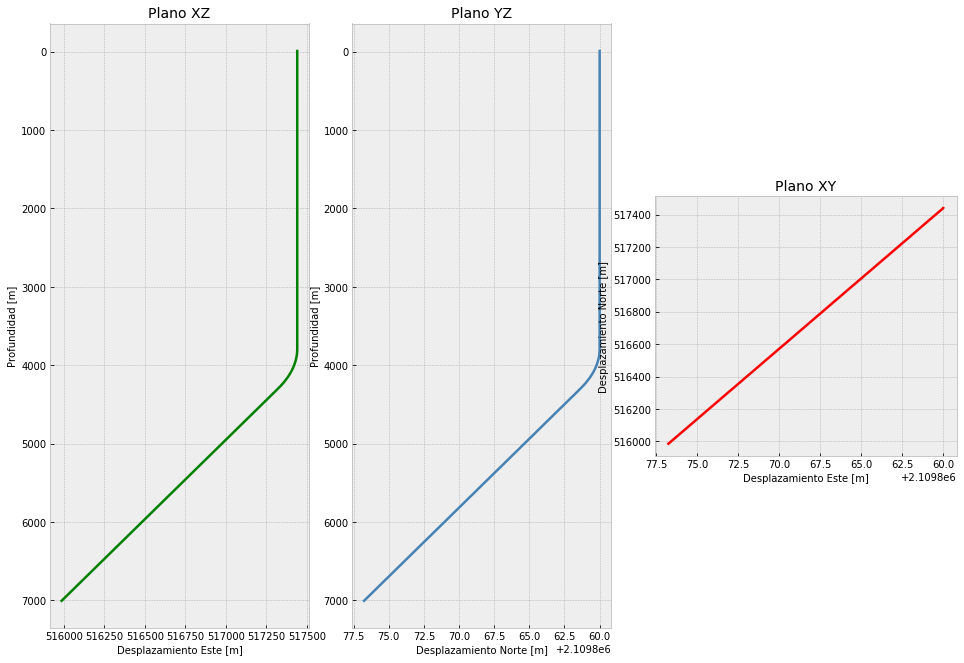

In [16]:
f1 = plt.figure(figsize = [12,12])
plt.style.use('bmh')

#Plano XZ
fig1 = f1.add_axes([0, 0, 0.30,0.7]) 
fig1.plot(A.X, A.TVD,'green', alpha=1, lw=2.5)
fig1.set_title('Plano XZ', fontsize='14')
fig1.set_ylabel('Profundidad ' + '[m]', fontsize = '10' )
fig1.set_xlabel('Desplazamiento Este '+ '[m]', fontsize = '10')
fig1.invert_yaxis()
fig1.grid
#Plano YZ

fig2 = f1.add_axes([0.35, 0, 0.30,0.7]) 
fig2.plot(A.Y, A.TVD,'steelblue', alpha=1, lw=2.5)
fig2.set_title('Plano YZ', fontsize='14')
fig2.set_ylabel('Profundidad ' + '[m]', fontsize = '10' )
fig2.set_xlabel('Desplazamiento Norte '+ '[m]', fontsize = '10')
fig2.invert_yaxis()
fig2.invert_xaxis()
fig2.grid

#Plano XY

fig3 = f1.add_axes([0.7, 0.2, 0.35,0.3]) 
fig3.plot(A.Y, A.X,'red', alpha=1, lw=2.5)
fig3.invert_xaxis()
fig3.set_title('Plano XY', fontsize='14')
fig3.set_ylabel('Desplazamiento Norte ' + '[m]', fontsize = '10' )
fig3.set_xlabel('Desplazamiento Este '+ '[m]', fontsize = '10')
fig3.grid

plt.show()

**Gráfica 3D de los planos del pozo**

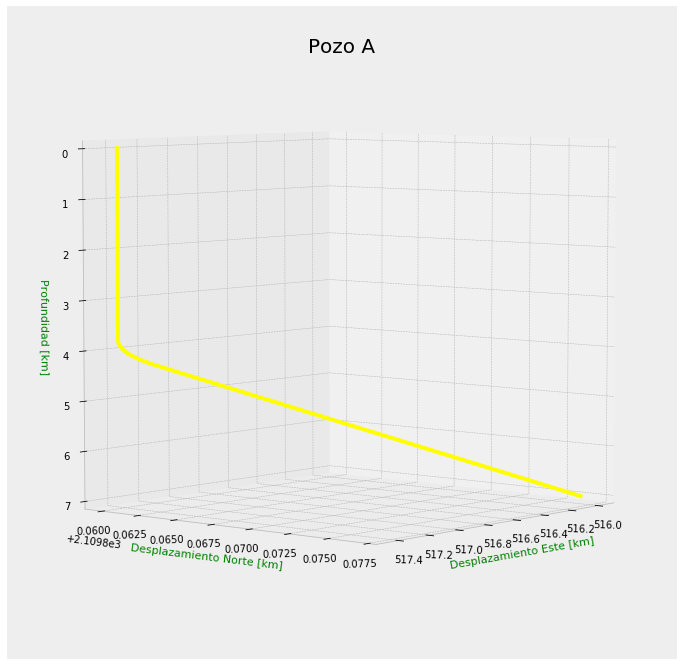

In [17]:
fig = plt.figure(figsize=[12, 12])
fig4 = fig.gca(projection='3d')

fig4.plot(A.X/1000, A.Y/1000,A.TVD/1000,  'yellow', lw=4)
fig4.set_title("Pozo A", color= "k", fontsize= 20)
fig4.invert_zaxis()
fig4.invert_xaxis()
fig4.invert_yaxis()
fig4.set_xlabel('Desplazamiento Este [km]' , fontsize=11,color= "g")
fig4.set_ylabel('Desplazamiento Norte [km]' , fontsize=11,color= "g")
fig4.set_zlabel('Profundidad [km]', fontsize=11,color= "g")
_ = plt.yticks(rotation = 2)
_ = plt.xticks(rotation = -2)

fig4.view_init(elev=5, azim=-140)

fig4.grid(True, c="g", alpha=0.7)

plt.show()

**Importar datos de las diferencias de X, Y y TVD**

In [18]:
dat=pd.read_csv('Trayectoria_deltas.csv') 
#print(dat)


In [19]:
difx=dat['DELTA_X'] 
dify=dat['DELTA_Y']
difz=dat['DELTA_TVD'] 

**Cálculo de azimut**


In [20]:
deltxy=dify/difx 

import numpy as np 
deltxy[np.isnan(deltxy)] = 0 #cambio de los valores nulos(NaN) por ceros.

az=np.arctan(np.abs(deltxy))

convg=(az*180)/(np.pi) #cambio de radianes a grados de los valores obtenidos en az

azimut=180-convg 






**Cálculo de inclinación**

In [21]:
E=np.sqrt(pow(difx,2)+ pow(dify,2)+ pow(difz,2)) #obtencion del módulo a partir de las diferencias de X,Y,Z
E=np.round(E,4) #delimitar valores a 4 cifras significativas
Q=difz/E

R=np.arccos(Q) #inclinacion en radianes 

K=(R*180)/np.pi #inclinación en grados

**Grafica de la trayectoria del pozo (inclinacion vs azimut)**

Antes de poder graficar se convirtieron los datos obtenidos de azimut e inclinación a coordenadas cartesianas

In [22]:
x2=(np.sin(az)*difx) #azimut
x3=(np.cos(az)*dify) #inclinacion 



**Profundidad dearrollada del pozo **

In [23]:
MD=np.abs(difz/(np.cos(R)))
import numpy as np 
MD[np.isnan(MD)] = 0


In [24]:
md = np.round(np.cumsum(MD),3)
print(md)

0        30.000
1        60.000
2        90.000
3       120.000
4       150.000
5       180.000
6       210.000
7       240.000
8       270.000
9       300.000
10      330.000
11      360.000
12      390.000
13      420.000
14      450.000
15      480.000
16      510.000
17      540.000
18      570.000
19      600.000
20      630.000
21      660.000
22      690.000
23      720.000
24      750.000
25      780.000
26      810.000
27      840.000
28      870.000
29      900.000
         ...   
218    6509.980
219    6539.989
220    6569.985
221    6599.985
222    6631.299
223    6659.980
224    6689.980
225    6719.988
226    6749.988
227    6779.984
228    6809.984
229    6839.983
230    6869.979
231    6899.988
232    6929.987
233    6959.987
234    6989.983
235    7019.983
236    7049.982
237    7079.978
238    7109.987
239    7139.986
240    7169.986
241    7199.982
242    7229.982
243    7259.981
244    7289.986
245    7319.986
246    7344.981
247    7344.981
Length: 248, dtype: floa

In [25]:
df=pd.DataFrame({'TVD':range(1,247),'X':range(1,247),'Y':range(1,247)})
FIN=A.assign(MD=md,AZIMUT=azimut,INCLINACION=K)
EX = FIN.iloc[ 1 : 247 , :] #se eliminó el ultimo renglon por conveniencia, ya que de este no se podian obtener las diferencias de x,y,z al ser el ultimonumero de la suceion.
print(EX)

         TVD          X           Y        MD      AZIMUT  INCLINACION
1      21.00  517440.00  2109860.00    60.000  180.000000     0.000000
2      51.00  517440.00  2109860.00    90.000  180.000000     0.000000
3      81.00  517440.00  2109860.00   120.000  180.000000     0.000000
4     111.00  517440.00  2109860.00   150.000  180.000000     0.000000
5     141.00  517440.00  2109860.00   180.000  180.000000     0.000000
6     171.00  517440.00  2109860.00   210.000  180.000000     0.000000
7     201.00  517440.00  2109860.00   240.000  180.000000     0.000000
8     231.00  517440.00  2109860.00   270.000  180.000000     0.000000
9     261.00  517440.00  2109860.00   300.000  180.000000     0.000000
10    291.00  517440.00  2109860.00   330.000  180.000000     0.000000
11    321.00  517440.00  2109860.00   360.000  180.000000     0.000000
12    351.00  517440.00  2109860.00   390.000  180.000000     0.000000
13    381.00  517440.00  2109860.00   420.000  180.000000     0.000000
14    

In [26]:
EX.to_csv('Pozo Desviado .csv', index=False, header=True)